In [1]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

## Convergence of the number of PC

In [241]:
pca = PCA(n_components = 50)

In [242]:
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.38889934 0.22377359 0.0633848  0.05349123 0.03941862 0.03205154
 0.02477007 0.02142772 0.01661084 0.01106567 0.01000368 0.00869902
 0.00747262 0.00679334 0.00618332 0.00557051 0.00492081 0.0046069
 0.00434221 0.00341809 0.00336425 0.00300078 0.00276212 0.0026001
 0.00228615 0.00216276 0.00187279 0.00182397 0.00174334 0.00164691
 0.00160647 0.00148483 0.00140719 0.0013277  0.00128678 0.00117235
 0.00114841 0.00107201 0.00095404 0.00090976 0.0008629  0.00083582
 0.00077686 0.00071642 0.00070263 0.00065967 0.00065291 0.00061519
 0.0005804  0.00054548]


In [243]:
sum  = 0
max_n_pc = 0
for i in range(len(pca.explained_variance_ratio_)):
    sum += pca.explained_variance_ratio_[i]
    if sum >= 0.90:
        max_n_pc = i+1
        print("Maximum value of n_pc：{}".format(max_n_pc))
        print(sum)        
        break

Maximum value of n_pc：13
0.9010687290780155


In [244]:
kernel_params = {"kernel": "rbf", "gamma": 1.0}
alpha = 1e-6
#krr = KernelRidge(alpha = alpha, **kernel_params)
numbers_pc = np.arange(max_n_pc+1)
#rr = Ridge(alpha= alpha)
numbers_train = np.arange(50,654,50)
losses = np.zeros((1,len(numbers_train)))
losses_pca = np.zeros((len(numbers_pc),len(numbers_train)))

In [245]:
for i,n_pc in enumerate(numbers_pc):
    print(n_pc)
    if i == 0:
        krr = KernelRidge(alpha = alpha, **kernel_params)
    else:
        pca = PCA(n_components = n_pc)
    for j,n in enumerate(numbers_train):
        Xt_train = X_train[:n]
        Yt_train = Y_train[:n]
        if i == 0:
            krr.fit(Xt_train,Yt_train)
            Y_pred = krr.predict(X_test)
            loss = mean_squared_error(Y_test, Y_pred)
            losses[i,j] = loss
        else:
            pca.fit(Xt_train)
            T_train = pca.transform(Xt_train)
            T_test = pca.transform(X_test)
            krr.fit(T_train,Yt_train)
            Y_pred_pca = krr.predict(T_test)
            loss_pca = mean_squared_error(Y_test, Y_pred_pca)
            losses_pca[i,j] = loss_pca

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [246]:
losses

array([[28.2376678 , 16.96988518, 14.46651784, 10.43656891,  8.66227686,
         6.96620881,  6.86299193,  6.46621697,  5.30453514,  4.03233565,
         1.38928411,  0.20744203,  0.17679152]])

In [247]:
losses_pca

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.52470825e+01, 2.37523297e+01, 2.73237928e+02, 1.50588528e+02,
        7.31836040e+01, 1.94332590e+01, 9.84205730e+00, 3.25032132e+00,
        5.27833691e+00, 5.72760864e+00, 3.23953563e+00, 3.26170691e+00,
        3.22501159e+00],
       [3.40116537e+03, 2.45252038e+01, 1.92720586e+02, 1.37888022e+03,
        5.05416404e+03, 1.06637591e+03, 1.00274637e+03, 4.53848871e+02,
        4.00368749e+01, 1.05550228e+01, 2.35037866e+00, 2.00779416e+00,
        1.91505930e+00],
       [3.07183812e+02, 2.19057588e+02, 1.00972720e+02, 4.36994151e+01,
        1.91877730e+01, 1.70025186e+01, 1.17894327e+01, 4.76609189e+01,
        6.91997126e+00, 1.45266905e+01, 4.31142030e+00, 1.89821826e+00,
        2.17609816e+00],
       [3.36815775e+01, 8.21859606e+

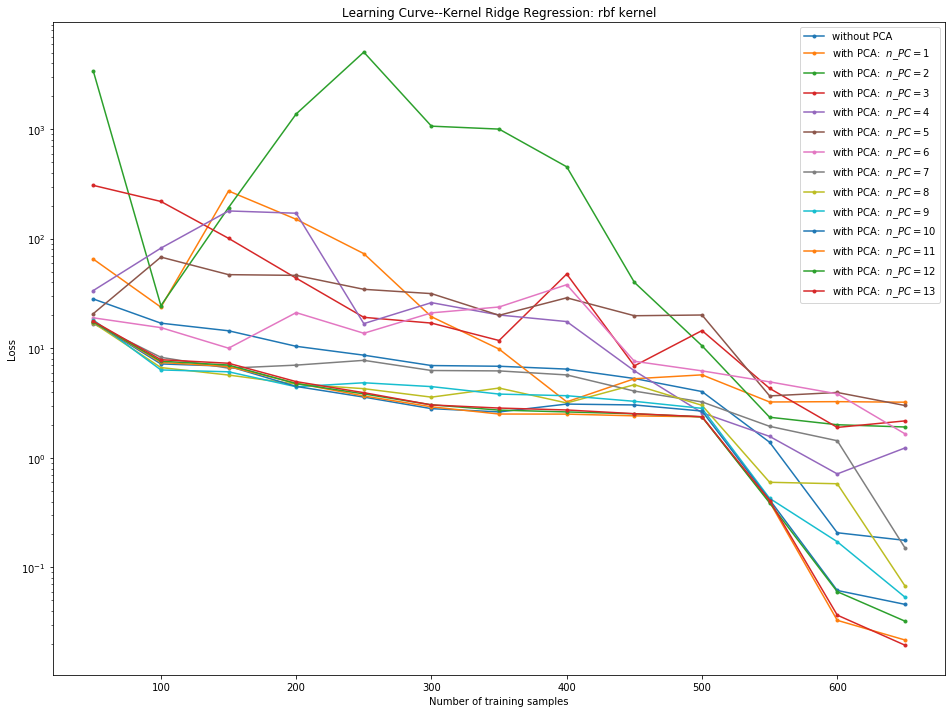

In [248]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses[0],'.-', label='without PCA')
for n_pc in np.arange(1,max_n_pc+1):
    plt.plot(numbers_train,losses_pca[n_pc],'.-', label='with PCA:  '+'$n\_PC = {}$'.format(n_pc))
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression: {} kernel'.format(kernel_params["kernel"]))
plt.show()

## Optimization  of gamma

In [302]:
kernel_params = {"kernel": "rbf", "gamma": 1.0}
alpha = 1e-6
#krr = KernelRidge(alpha = alpha, **kernel_params)
#max_n_pc = 13
pca = PCA(n_components = max_n_pc)
#rr = Ridge(alpha= alpha)
gammas = np.logspace(-4, 1, 11)
numbers_train = np.arange(50,654,50)
n_plots = 3
losses = np.zeros((len(gammas),len(numbers_train)))
losses_pca = np.zeros((len(gammas),len(numbers_train)))

In [303]:
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = alpha, **kernel_params)
    print(gamma)
    for j,n in enumerate(numbers_train):
        Xt_train = X_train[:n]
        Yt_train = Y_train[:n]
        krr.fit(Xt_train,Yt_train)
        Y_pred = krr.predict(X_test)
        loss = mean_squared_error(Y_test, Y_pred)
        losses[i,j] = loss
        pca.fit(Xt_train)
        T_train = pca.transform(Xt_train)
        T_test = pca.transform(X_test)
        krr.fit(T_train,Yt_train)
        Y_pred_pca = krr.predict(T_test)
        loss_pca = mean_squared_error(Y_test, Y_pred_pca)
        losses_pca[i,j] = loss_pca

0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0


In [304]:
losses

array([[2.35342468e+00, 1.77801799e+00, 1.31291395e+00, 8.70552353e-01,
        8.71288433e-01, 8.67749940e-01, 7.72929035e-01, 7.91449673e-01,
        6.79149323e-01, 3.12520214e-01, 8.39932823e-02, 4.04188041e-02,
        3.83335815e-02],
       [2.36415416e+00, 1.84787311e+00, 1.36584634e+00, 9.28096064e-01,
        9.07299499e-01, 8.42108560e-01, 6.99739292e-01, 7.25168070e-01,
        6.17970800e-01, 2.98318885e-01, 9.45256064e-02, 3.11811523e-02,
        3.27963011e-02],
       [2.37851163e+00, 1.83862749e+00, 1.37248323e+00, 9.29542284e-01,
        8.83061326e-01, 7.77297829e-01, 6.20455106e-01, 6.49699892e-01,
        5.58580854e-01, 2.90761186e-01, 1.15799936e-01, 2.89380126e-02,
        3.25749422e-02],
       [2.44646023e+00, 1.77152833e+00, 1.29330638e+00, 8.89665959e-01,
        8.23352492e-01, 6.92029649e-01, 5.54985676e-01, 5.77924163e-01,
        5.10895373e-01, 2.79372009e-01, 1.19157842e-01, 2.37533281e-02,
        2.59558892e-02],
       [2.78299583e+00, 1.67345062e+

In [305]:
losses_pca

array([[3.42813534e+00, 1.67090364e+00, 1.65178220e+00, 1.56272750e+00,
        1.48115478e+00, 1.30102750e+00, 1.25678077e+00, 1.17293273e+00,
        1.15513009e+00, 1.28693635e+00, 1.18676741e+00, 1.17167290e+00,
        1.17580870e+00],
       [7.23506291e+00, 1.56260217e+00, 1.59524839e+00, 1.37112114e+00,
        1.27233449e+00, 1.10371920e+00, 1.03467361e+00, 9.53448622e-01,
        9.66432006e-01, 1.10049410e+00, 8.36039123e-01, 7.84743855e-01,
        8.03146691e-01],
       [1.45369579e+01, 1.92377224e+00, 1.95444715e+00, 1.62671115e+00,
        1.35049364e+00, 1.00591207e+00, 9.03933413e-01, 7.86655303e-01,
        8.39870343e-01, 1.03664480e+00, 5.93913277e-01, 5.15055585e-01,
        5.28790463e-01],
       [1.48874221e+01, 4.17786731e+00, 4.32360268e+00, 4.36673867e+00,
        1.97149065e+00, 1.11067073e+00, 9.20978546e-01, 7.77000437e-01,
        9.34205864e-01, 1.08048005e+00, 4.54934202e-01, 3.86433208e-01,
        3.60688858e-01],
       [9.35930098e+00, 6.46301195e+

In [306]:
optimal_index_loss = np.unravel_index(losses.argmin(), losses.shape)
optimal_index_loss_pca = np.unravel_index(losses_pca.argmin(), losses_pca.shape)

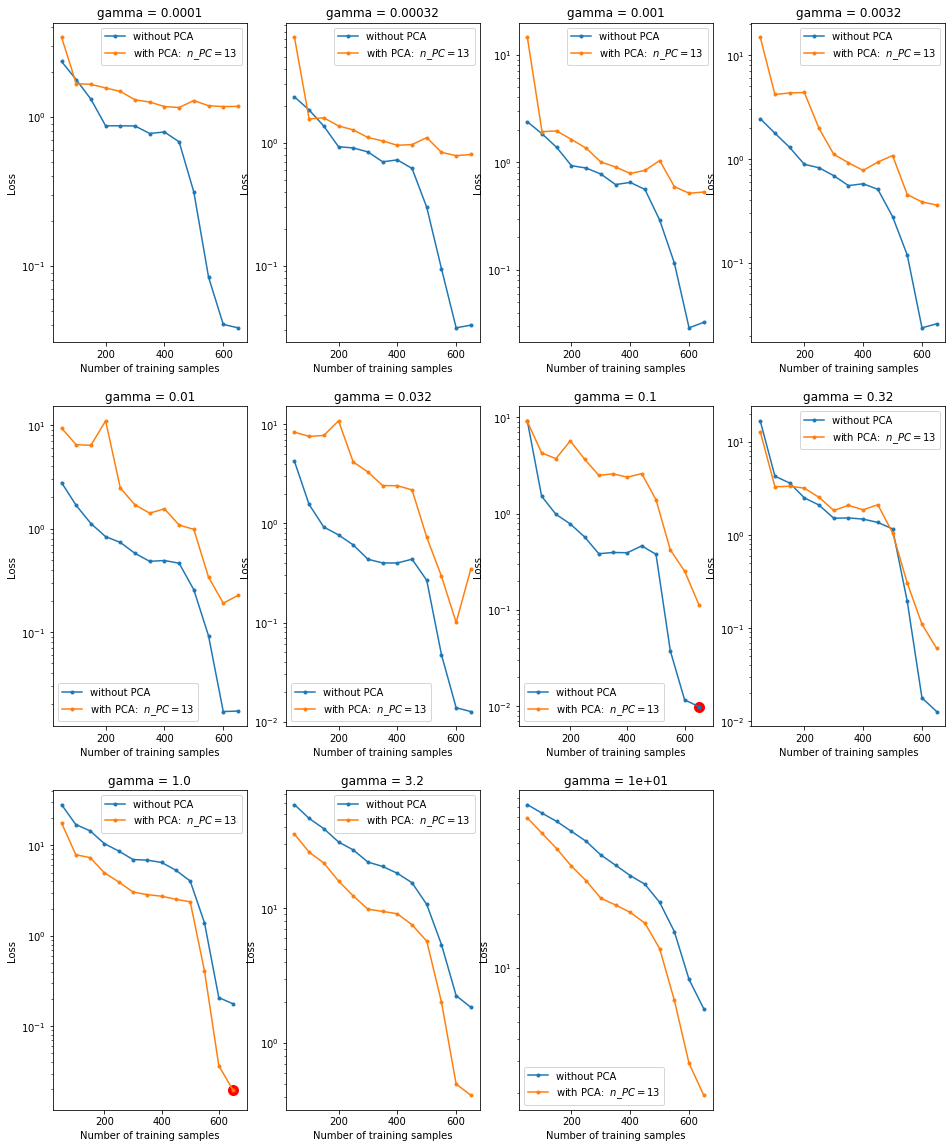

In [307]:
#fig,ax =  plt.subplots(n_plots,int(np.ceil(len(gammas)/n_plots)))
plt.figure(figsize=(16, 20))
for i in range(len(gammas)):
    plt.subplot(n_plots,int(np.ceil(len(gammas)/n_plots)),i+1)  
    plt.plot(np.arange(50,654,50),losses[i],'.-', label='without PCA')
    plt.plot(np.arange(50,654,50),losses_pca[i],'.-', label='with PCA:  '+'$n\_PC = {}$'.format(max_n_pc))
    plt.xlabel('Number of training samples')
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('gamma = {:.2}'.format(gammas[i]))
    if i == optimal_index_loss[0]:
        plt.scatter(numbers_train[optimal_index_loss[1]], losses[optimal_index_loss[0],optimal_index_loss[1]], s = 100,marker='o', color='r')
    if i == optimal_index_loss_pca[0]:
        plt.scatter(numbers_train[optimal_index_loss_pca[1]], losses_pca[optimal_index_loss_pca[0],optimal_index_loss_pca[1]], s = 100, marker='o', color='r')
plt.show()


In [308]:
print("When Gamma = {}, Minimum loss of KRR without PCA is {} ".format(gammas[optimal_index_loss[0]],losses.min()))
print("When Gamma = {}, Minimum loss of KRR with PCA is {} ".format(gammas[optimal_index_loss_pca[0]],losses_pca.min()))

When Gamma = 0.1, Minimum loss of KRR without PCA is 0.00990765522471401 
When Gamma = 1.0, Minimum loss of KRR with PCA is 0.019547422258691625 


## Optimization  of alpha

In [291]:
kernel_params = {"kernel": "rbf", "gamma": 1.0}
alphas =  np.logspace(-8, -1, 15)
#krr = KernelRidge(alpha = alpha, **kernel_params)
#max_n_pc = 13
pca = PCA(n_components = max_n_pc)
#rr = Ridge(alpha= alpha)
#gammas = np.logspace(-4, 1, 11)
numbers_train = np.arange(50,654,50)
n_plots = 3
losses = np.zeros((len(alphas),len(numbers_train)))
losses_pca = np.zeros((len(alphas),len(numbers_train)))


In [292]:
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    print(alpha)
    for j,n in enumerate(numbers_train):
        Xt_train = X_train[:n]
        Yt_train = Y_train[:n]
        krr.fit(Xt_train,Yt_train)
        Y_pred = krr.predict(X_test)
        loss = mean_squared_error(Y_test, Y_pred)
        losses[i,j] = loss
        pca.fit(Xt_train)
        T_train = pca.transform(Xt_train)
        T_test = pca.transform(X_test)
        krr.fit(T_train,Yt_train)
        Y_pred_pca = krr.predict(T_test)
        loss_pca = mean_squared_error(Y_test, Y_pred_pca)
        losses_pca[i,j] = loss_pca

1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1


In [293]:
optimal_index_loss = np.unravel_index(losses.argmin(), losses.shape)
optimal_index_loss_pca = np.unravel_index(losses_pca.argmin(), losses_pca.shape)

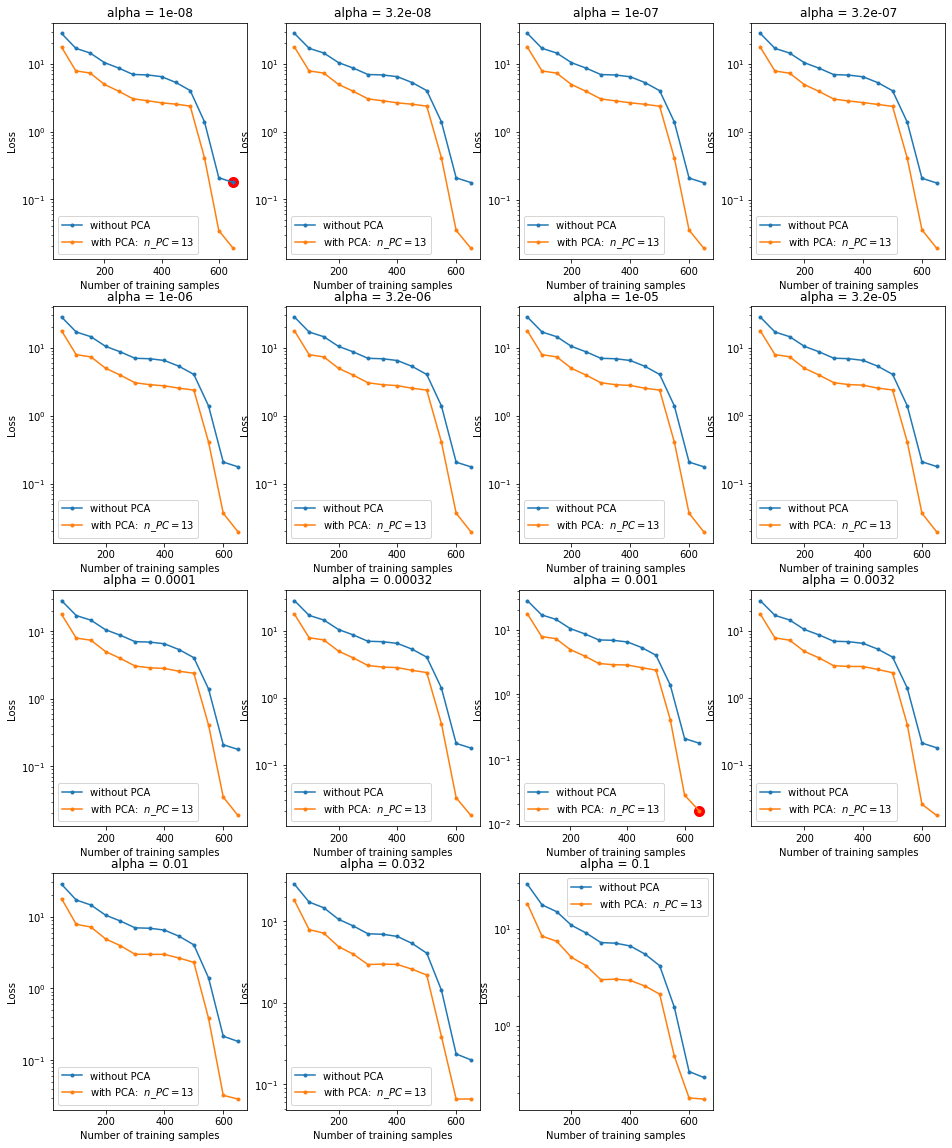

In [299]:
#fig,ax =  plt.subplots(n_plots,int(np.ceil(len(gammas)/n_plots)))
plt.figure(figsize=(16, 20))
n_plots = 4
for i in range(len(alphas)):
    plt.subplot(n_plots,int(np.ceil(len(alphas)/n_plots)),i+1)  
    plt.plot(numbers_train,losses[i],'.-', label='without PCA')
    plt.plot(numbers_train,losses_pca[i],'.-', label='with PCA:  '+'$n\_PC = {}$'.format(max_n_pc))
    plt.xlabel('Number of training samples')
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('alpha = {:.2}'.format(alphas[i]))
    if i == optimal_index_loss[0]:
        plt.scatter(numbers_train[optimal_index_loss[1]], losses[optimal_index_loss[0],optimal_index_loss[1]], s = 100,marker='o', color='r')
    if i == optimal_index_loss_pca[0]:
        plt.scatter(numbers_train[optimal_index_loss_pca[1]], losses_pca[optimal_index_loss_pca[0],optimal_index_loss_pca[1]], s = 100, marker='o', color='r')
plt.show()

In [300]:
print("When alpha = {}, Minimum loss of KRR without PCA is {} ".format(alphas[optimal_index_loss[0]],losses.min()))
print("When alpha = {}, Minimum loss of KRR with PCA is {} ".format(alphas[optimal_index_loss_pca[0]],losses_pca.min()))

When alpha = 1e-08, Minimum loss of KRR without PCA is 0.1767594938158182 
When alpha = 0.001, Minimum loss of KRR with PCA is 0.016071155804537295 
